<a href="https://colab.research.google.com/github/jv-mendes07/netflix-EDA-/blob/main/Netflix%20(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória De Dados - Netflix 

In [ ]:
# Importação das bibliotecas para realizar a análise exploratória:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importação do dataset da Netflix:
df_netflix = pd.read_csv('/content/drive/MyDrive/netflix_titles.csv')
print(df_netflix.shape)
df_netflix.head()

(8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## (1) Tratamento dos dados:

In [ ]:
# Renomeação das colunas para nomes mais intuitivos:
df_netflix.rename(columns = {
    'show_id': 'id',
    'type' : 'tipo', 
    'title' : 'titulo', 
    'director' : 'diretor', 
    'cast' : 'elenco', 
    'country': 'cidade', 
    'date_added' : 'data_add',
    'release_year' : 'ano_realizado', 
    'rating': 'avaliacao', 
    'duration': 'duracao', 
    'listed_in' : 'listado_em', 
    'description': 'descricao'
}, inplace = True)
df_netflix.columns

Index(['id', 'tipo', 'titulo', 'diretor', 'elenco', 'cidade', 'data_add',
       'ano_realizado', 'avaliacao', 'duracao', 'listado_em', 'descricao'],
      dtype='object')

In [ ]:
# Informação geral do dataset e das colunas constituintes:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             8807 non-null   object
 1   tipo           8807 non-null   object
 2   titulo         8807 non-null   object
 3   diretor        6173 non-null   object
 4   elenco         7982 non-null   object
 5   cidade         7976 non-null   object
 6   data_add       8797 non-null   object
 7   ano_realizado  8807 non-null   int64 
 8   avaliacao      8803 non-null   object
 9   duracao        8804 non-null   object
 10  listado_em     8807 non-null   object
 11  descricao      8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# Criação de um dicionário para substituir o nome dos meses pelos números que os representam:
lista_a = {'January': '1', 'February': '2', 'March': '3', 'April': '4', 'May': '5',
           'June': '6', 'July': '7', 'August': '8', 'September': '9', 'October': '10', 'November': '11',
           'December': '12'}
print(lista_a)

{'January': '1', 'February': '2', 'March': '3', 'April': '4', 'May': '5', 'June': '6', 'July': '7', 'August': '8', 'September': '9', 'October': '10', 'November': '11', 'December': '12'}


In [ ]:
# For para aplicar determinada substituição iterativa dos nomes dos meses pelos números representacionais:
for i, j in lista_a.items():
  df_netflix.data_add = df_netflix.data_add.str.replace(i, j)
df_netflix.data_add

0        9 25, 2021
1        9 24, 2021
2        9 24, 2021
3        9 24, 2021
4        9 24, 2021
           ...     
8802    11 20, 2019
8803      7 1, 2019
8804     11 1, 2019
8805     1 11, 2020
8806      3 2, 2019
Name: data_add, Length: 8807, dtype: object

In [ ]:
# Substituição de vírgulas por traços para facilitar na conversão da coluna de object para datetime:
df_netflix.data_add = df_netflix.data_add.str.replace(' ', '-').str.replace(',', '-').str.replace('--', '-')
df_netflix.data_add

0        9-25-2021
1        9-24-2021
2        9-24-2021
3        9-24-2021
4        9-24-2021
           ...    
8802    11-20-2019
8803      7-1-2019
8804     11-1-2019
8805     1-11-2020
8806      3-2-2019
Name: data_add, Length: 8807, dtype: object

In [ ]:
# Correção de erros que estão presentes nos dados para evitar erros na conversão da coluna de object para datetime:
df_netflix.data_add = np.where(df_netflix.data_add.str[0] == '-', '', df_netflix.data_add)
df_netflix[df_netflix.data_add.str[0] == '-']

,id,tipo,titulo,diretor,elenco,cidade,data_add,ano_realizado,avaliacao,duracao,listado_em,descricao


In [ ]:
# Após todo o processo de limpeza dos da coluna, há como convertermos a coluna de object para datetime:
df_netflix.data_add = pd.to_datetime(df_netflix.data_add,
               infer_datetime_format = True)
df_netflix.data_add

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: data_add, Length: 8807, dtype: datetime64[ns]

## (1) Há mais filmes ou séries adicionadas disponivelmente na Netflix?

In [ ]:
# Verificação quantitativa de filmes e séries disponíveis na Netflix:
df_netflix.tipo.value_counts()

Movie      6131
TV Show    2676
Name: tipo, dtype: int64

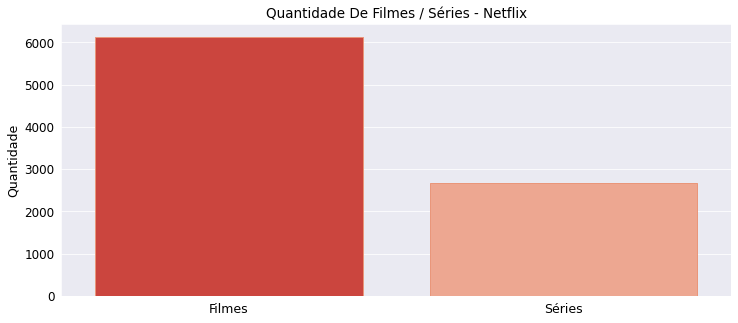

In [ ]:
# Gráfico de coluna para representar a quantidade de filmes e séries disponíveis na Netflix:
sns.set_style('darkgrid')
ax = sns.barplot(x = df_netflix.tipo.value_counts().index.to_list(),
                 y = df_netflix.tipo.value_counts().to_list(),
                 palette = 'Reds_r', edgecolor = 'darksalmon')
ax.figure.set_size_inches(12, 5)
ax.set_xticklabels(['Filmes', 'Séries'], fontsize = 12.5, color = 'k')
ax.set_yticklabels([0, 1000, 2000, 3000, 4000, 5000, 6000], fontsize = 12, color = 'k')
ax.set_ylabel('Quantidade', fontsize = 12.5, color = 'k')
ax.set_title('Quantidade De Filmes / Séries - Netflix', fontsize = 13.5, color = 'k');

In [ ]:
# Seleção de uma paleta de cor para utiliza-la no gráfico de pizza:
sns.color_palette('Reds_r')

[(0.6663437139561708, 0.06339100346020761, 0.08641291810841982),
 (0.8370472895040368, 0.13394848135332565, 0.13079584775086506),
 (0.9570011534025374, 0.3087120338331411, 0.22191464821222606),
 (0.9865897731641676, 0.5067281814686659, 0.38123798539023457),
 (0.9882352941176471, 0.6866743560169165, 0.5778854286812765),
 (0.9950634371395617, 0.8596539792387543, 0.7986620530565167)]

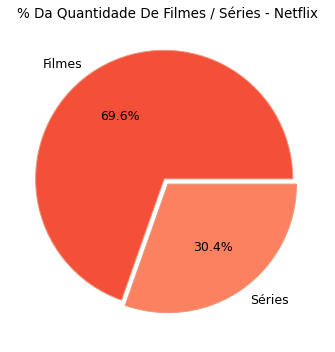

In [ ]:
# Gráfico de pizza para representar percentualmente a quantidade de filmes ou séries disponíveis na Netflix:
cores = sns.color_palette('Reds_r')[2::]
plt.figure(figsize = (12, 5))
plt.pie(x = df_netflix.tipo.value_counts().to_list(),
        labels = ['Filmes', 'Séries'], colors = cores,
        autopct = '%1.1f%%', wedgeprops = {'edgecolor': 'darksalmon'},
        textprops = {'fontsize': 12.5, 'color' : 'black'},
        explode = [0.05, 0.0])
plt.title('% Da Quantidade De Filmes / Séries - Netflix', fontsize = 13.5, color = 'k')
plt.tight_layout();

### Disparadamente há mais filmes disponíveis na Netflix em comparação à quantidade de séries, a diferença na quantidade de filmes e séries é gritante em que o registro de filmes disponíveis é de 6131 em comparação à 2676 séries disponíveis na plataforma, e percentualmente a quantidade de filmes é de 70 % comparativamente à de séries que é de 30 %.

## (2) Quais países são destacáveis na produção de filmes ou séries na Netflix?

In [ ]:
# Agrupamento da quantidade de filmes e séries produzidas por país:
df_netflix.groupby('cidade').agg({'titulo': 'size'}).rename(columns = 
                                                            {'titulo': 'qtd'}
                                                            ).reset_index().sort_values(by = 'qtd', ascending = False).head(10)

,cidade,qtd
603,United States,2818
251,India,972
506,United Kingdom,419
319,Japan,245
435,South Korea,199
58,Canada,181
444,Spain,145
162,France,124
342,Mexico,110
150,Egypt,106


In [ ]:
# Agrupamento da quantidade de séries produzidas por país:
df_netflix.query('tipo == "TV Show"').groupby('cidade').agg({
    'titulo': 'size'}).rename(columns = {'titulo': 'qtd'}).reset_index().sort_values(by = 'qtd', ascending = False).head(10)

,cidade,qtd
160,United States,760
140,United Kingdom,213
83,Japan,169
120,South Korea,158
66,India,79
132,Taiwan,68
17,Canada,59
47,France,49
4,Australia,48
125,Spain,48


In [ ]:
# Agrupamento da quantidade de filmes produzidos por país:
df_netflix.query('tipo == "Movie"').groupby('cidade').agg({
    'titulo': 'size'}).rename(columns = {'titulo': 'qtd'}).reset_index().sort_values(by = 'qtd', ascending = False).head(10)

,cidade,qtd
525,United States,2058
218,India,893
440,United Kingdom,206
50,Canada,122
384,Spain,97
128,Egypt,92
319,Nigeria,86
238,Indonesia,77
428,Turkey,76
278,Japan,76


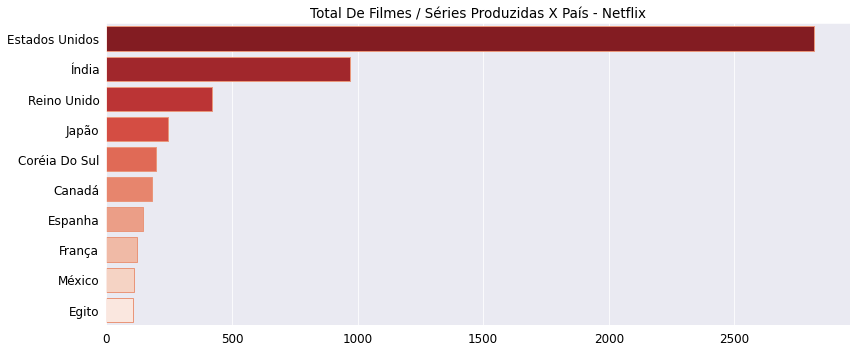

In [ ]:
# Gráfico de barras para representar a quantidade de filmes e séries produzidos por país e disponibilizados pela Netflix:
ax = sns.barplot(data = df_netflix.groupby('cidade').agg({'titulo': 'size'}).rename(columns = 
                                                            {'titulo': 'qtd'}
                                                            ).reset_index().sort_values(by = 'qtd', ascending = False).head(10),
                      x = 'qtd', y = 'cidade', palette = 'Reds_r', edgecolor = 'darksalmon')
ax.set_ylabel('')
ax.figure.set_size_inches(12, 5)
ax.set_yticklabels(['Estados Unidos', 'Índia', 'Reino Unido', 'Japão', 'Coréia Do Sul',
                       'Canadá', 'Espanha', 'França', 'México', 'Egito'], fontsize = 12, color = 'k')
ax.set_xlabel('')
ax.set_xticklabels([0, 500, 1000, 1500, 2000, 2500], fontsize = 12, color = 'k')
ax.set_title('Total De Filmes / Séries Produzidas X País - Netflix', fontsize = 13.5, color = 'k')
plt.tight_layout();

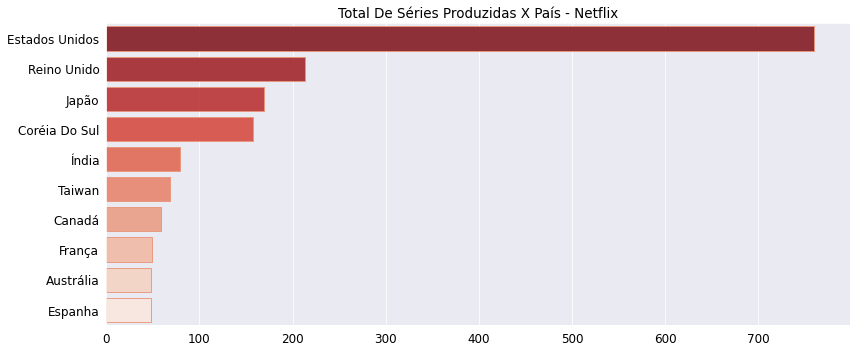

In [ ]:
# Gráfico de barras para representar a quantidade de filmes e séries produzidos por país e disponibilizados pela Netflix:
ax = sns.barplot(data = df_netflix.query('tipo == "TV Show"').groupby('cidade').agg({
    'titulo': 'size'}).rename(columns = {'titulo': 'qtd'}).reset_index().sort_values(by = 'qtd', ascending = False).head(10),
                      y = 'cidade',
                      x = 'qtd', palette = 'Reds_r', edgecolor = 'darksalmon', alpha = 0.9)
ax.set_ylabel('')
ax.figure.set_size_inches(12, 5)
ax.set_yticklabels(['Estados Unidos', 'Reino Unido', 'Japão',
                       'Coréia Do Sul', 'Índia', 'Taiwan', 'Canadá',
                       'França', 'Austrália', 'Espanha'], fontsize = 12, color = 'k')
ax.set_xticklabels([0, 100, 200, 300, 400, 500, 600, 700], color = 'k', fontsize = 12)
ax.set_xlabel('')
ax.set_title('Total De Séries Produzidas X País - Netflix', fontsize = 13.5, color = 'k')
plt.tight_layout();

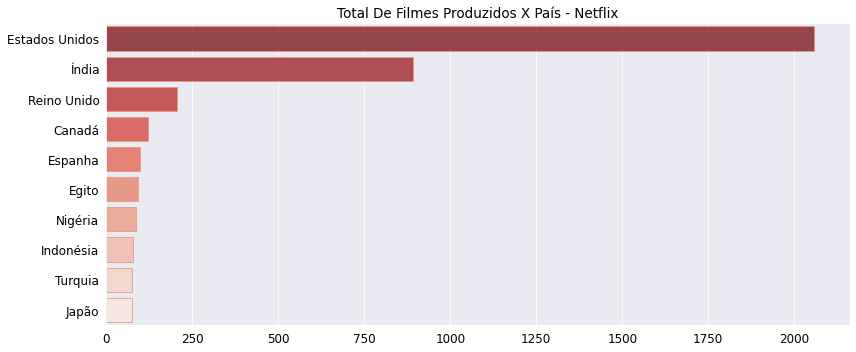

In [ ]:
# Gráfico de barras para representar a quantidade de filmes e séries produzidos por país e disponibilizados pela Netflix:
ax = sns.barplot(data = df_netflix.query('tipo == "Movie"').groupby('cidade').agg({
    'titulo': 'size'}).rename(columns = {'titulo': 'qtd'}).reset_index().sort_values(by = 'qtd', ascending = False).head(10),
                      y = 'cidade',
                      x = 'qtd', palette = 'Reds_r', edgecolor = 'darksalmon', alpha = 0.8)
ax.set_ylabel('')
ax.set_yticklabels(['Estados Unidos', 'Índia', 'Reino Unido', 'Canadá', 'Espanha',
                       'Egito', 'Nigéria', 'Indonésia', 'Turquia', 'Japão'], fontsize = 12, color = 'k')
ax.figure.set_size_inches(12, 5)
ax.set_xlabel('')
ax.set_xticklabels(list(range(0, 2001, 250)), fontsize = 12, color = 'k')
ax.set_title('Total De Filmes Produzidos X País - Netflix', fontsize = 13.5, color = 'k')
plt.tight_layout();

### Como expectante, o Estados Unidos é o país mais destacável na produção de filmes e séries, abaixo há países como o Reino Unido, Córeia do Sul, Índia e Japão como países destacáveis na produção de filmes ou séries disponibilizados na Netflix.

## (3) Quais diretores que mais produziram filmes e disponibilizaram para Netflix?

In [ ]:
# Agrupamento da quantidade de filmes produzidos e disponibilizados para Netflix por diretor do filme:
df_netflix.query('tipo == "Movie"').groupby('diretor').agg({'tipo': 'size'}).reset_index().sort_values(by = 'tipo', ascending = False).assign( acumulado = 
    (df_netflix.query('tipo == "Movie"').groupby('diretor').agg({'tipo': 'size'}).reset_index().sort_values(by = 'tipo', ascending = False
                                                                                                            ).tipo / df_netflix.query(
                                                                                                                'tipo == "Movie"').shape[0] * 100
     ).round(2)
).head(10)

,diretor,tipo,acumulado
3252,Rajiv Chilaka,19,0.31
3303,"Raúl Campos, Jan Suter",18,0.29
3885,Suhas Kadav,16,0.26
2492,Marcus Raboy,15,0.24
1716,Jay Karas,14,0.23
661,Cathy Garcia-Molina,13,0.21
2562,Martin Scorsese,12,0.20
1713,Jay Chapman,12,0.20
4306,Youssef Chahine,12,0.20
3862,Steven Spielberg,11,0.18


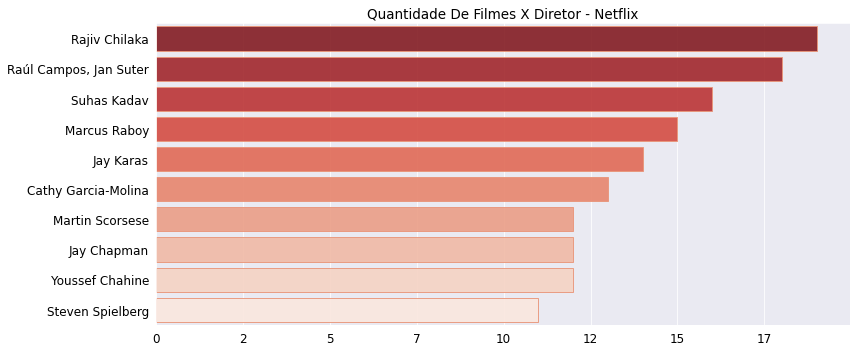

In [ ]:
# Gráfico de barras para representar quantitativamente os filmes produzidos e disponibilizados por diretor:
ax = sns.barplot(data = df_netflix.query('tipo == "Movie"').groupby('diretor'
).agg({'tipo': 'size'}).reset_index().sort_values('tipo', ascending = False).head(10),
y = 'diretor', x = 'tipo', palette = 'Reds_r', alpha = 0.9, edgecolor = 'darksalmon')
ax.figure.set_size_inches(12, 5)
ax.set_xlabel('')
ax.set_xticklabels([0, 2, 5, 7, 10, 12, 15, 17], fontsize = 12, color = 'k')
ax.set_ylabel('')
ax.set_yticklabels(df_netflix.query('tipo == "Movie"').groupby('diretor'
).agg({'tipo': 'size'}).reset_index().sort_values('tipo', ascending = False).head(10).diretor.to_list(),
color = 'k', fontsize = 12)
ax.set_title('Quantidade De Filmes X Diretor - Netflix', fontsize = 13.5, color = 'k')
plt.tight_layout();

## Basicamente, o diretor com mais filmes dirigidos e disponibilizados para a Netflix é o diretor Rajiv Chilaka reconhecido principalmente como um diretor de filmes de animação. 

## Os diretores mais populares inclusos nessa lista são Martin Scorsese diretor de filmes famigerados como O Lobo De Wall Street e Táxi Driver, semelhantemente há o diretor altamente reconhecido Steven Spielberg diretor de filmes como A Lista De Schindler e De Volta Para O Futuro.

## (4) Desde o ano da fundação da Netflix, quantos filmes e séries foram adicionados à plataforma há cada ano?

In [ ]:
# Agrupamento da quantidade de filmes ou séries adicionadas por ano na Netflix:
df_netflix.groupby([df_netflix.data_add.dt.year, 'tipo']).agg({'tipo': 'size'}).rename(
    columns = {'tipo': 'qtd'}
).sort_values('qtd', ascending = False)

,,qtd
data_add,tipo,
2019.0,Movie,1424
2020.0,Movie,1284
2018.0,Movie,1237
2021.0,Movie,993
2017.0,Movie,839
2020.0,TV Show,594
2019.0,TV Show,575
2021.0,TV Show,505
2018.0,TV Show,388


In [ ]:
# Agrupamento da quantidade de filmes adicionados à Netflix por ano:
df_netflix.groupby([df_netflix.data_add.dt.year, 'tipo']).agg({'tipo': 'size'}).rename(
    columns = {'tipo': 'qtd'}
).sort_values('qtd', ascending = False).swaplevel().loc['Movie'].reset_index()

,data_add,qtd
0,2019.0,1424
1,2020.0,1284
2,2018.0,1237
3,2021.0,993
4,2017.0,839
5,2016.0,253
6,2015.0,56
7,2014.0,19
8,2011.0,13
9,2013.0,6


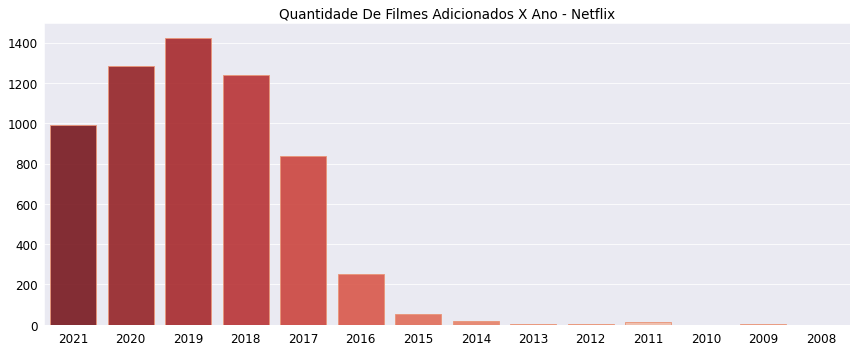

In [ ]:
# Gráfico de colunas para representar a quantidade de filmes adicionados por ano na Netflix:
ax = sns.barplot(y = df_netflix.groupby([df_netflix.data_add.dt.year, 'tipo']).agg({'tipo': 'size'}).rename(
    columns = {'tipo': 'qtd'}
).sort_values('qtd', ascending = False).swaplevel().loc['Movie'].reset_index().qtd.to_list(),
x = df_netflix.groupby([df_netflix.data_add.dt.year, 'tipo']).agg({'tipo': 'size'}).rename(
    columns = {'tipo': 'qtd'}
).sort_values('qtd', ascending = False).swaplevel().loc['Movie'].reset_index().data_add, palette = 'Reds',
alpha = 0.9, edgecolor = 'darksalmon')
ax.figure.set_size_inches(12, 5)
ax.set_xlabel('')
ax.set_xticklabels(list(reversed([2021, 2020, 2019, 2018, 2017,
                    2016, 2015, 2014, 2013, 2012, 2011, 
                    2010, 2009, 2008])), fontsize = 12, color = 'k')
ax.set_yticklabels([0, 200, 400, 600, 800, 1000, 1200, 1400], color = 'k', fontsize = 12)
ax.set_title('Quantidade De Filmes Adicionados X Ano - Netflix', fontsize = 13.5, color = 'k')
ax.invert_xaxis()
plt.tight_layout();

In [ ]:
# Agrupamento da quantidade de séries adicionadas à Netflix por ano:
df_netflix.groupby([df_netflix.data_add.dt.year, 'tipo']).agg({'tipo': 'size'}).rename(columns = {
    'tipo': 'qtd'
}).sort_values('qtd', ascending = False).swaplevel().loc['TV Show']

,qtd
data_add,
2020.0,594
2019.0,575
2021.0,505
2018.0,388
2017.0,325
2016.0,165
2015.0,17
2014.0,4
2013.0,4


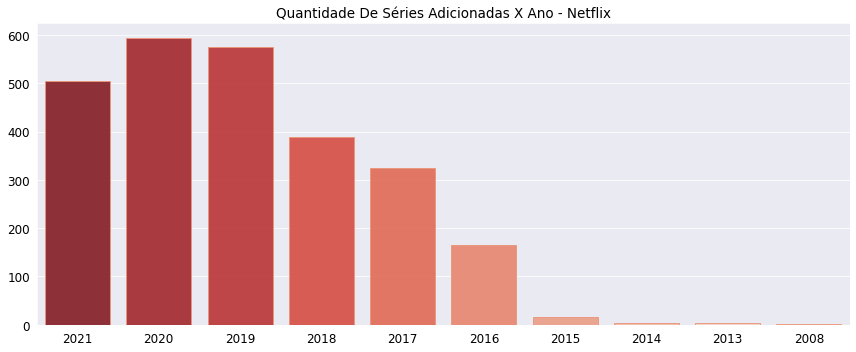

In [ ]:
# Gráfico de colunas para representar a quantidade de séries adicionadas à plataforma da Netflix por ano:
ax = sns.barplot(y = df_netflix.groupby([df_netflix.data_add.dt.year, 'tipo']).agg({'tipo': 'size'}).rename(
    columns = {'tipo': 'qtd'}
).sort_values('qtd', ascending = False).swaplevel().loc['TV Show'].reset_index().qtd.to_list(),
x = df_netflix.groupby([df_netflix.data_add.dt.year, 'tipo']).agg({'tipo': 'size'}).rename(
    columns = {'tipo': 'qtd'}
).sort_values('qtd', ascending = False).swaplevel().loc['TV Show'].reset_index().data_add, palette = 'Reds',
alpha = 0.9, edgecolor = 'darksalmon')
ax.figure.set_size_inches(12, 5)
ax.set_xlabel('')
ax.set_xticklabels(list(reversed([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2008])), fontsize = 12, color = 'k')
ax.set_yticklabels(list(range(0, 601, 100)), color = 'k', fontsize = 12)
ax.set_title('Quantidade De Séries Adicionadas X Ano - Netflix', fontsize = 13.5, color = 'k')
ax.invert_xaxis()
plt.tight_layout();

## Basicamente, 2019 foi o ano que teve mais filmes adicionados a plataforma da Netflix, abaixo de 2019, 2020 foi o ano com mais filmes adicionáveis à plataforma.

## Em relação à séries, inversamente 2020 foi o ano com mais séries adicionadas à plataforma e 2019 foi o segundo ano classificamente com mais séries aditivas à Netflix. 

## Há como observarmos e supormos que no início a plataforma teve dificuldade para adicionar novos filmes ou séries à plataforma por não terem tanto retorno financeiro para reinvestir largamente em mais filmes e séries para adicionar à plataforma. Conforme o sucesso mercadológico pela empresa, mais filmes e séries foram facilmente disponibilizadas e permissivas para que a empresa disponibilizasse na plataforma.

## (5) Quais filmes ou séries adicionadas à plataforma da Netflix têm mais tempo de duração? Ou seja, quais filmes em minutos têm mais tempo de duração e quais séries têm mais temporadas realizadas?

In [ ]:
# Criação de uma nova coluna para representar a quantidade de minutos ou temporadas de cada filme ou série:
df_netflix = df_netflix.assign(duracao_qtd = df_netflix.duracao.str.split(' ', expand = True)[0],
                  min_ou_season = df_netflix.duracao.str.split(' ', expand = True)[1])
df_netflix.head()

,id,tipo,titulo,diretor,elenco,cidade,data_add,ano_realizado,avaliacao,duracao,listado_em,descricao,duracao_qtd,min_ou_season
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,Season
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,Season
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,Seasons


In [ ]:
# Verificação de tipos das colunas que foram quebradas e criadas:
df_netflix[['duracao_qtd', 'min_ou_season']].dtypes

duracao_qtd      object
min_ou_season    object
dtype: object

In [ ]:
# Transformar os números que representam a quantidade de minutos ou temporadas de object para tipo numérico:
df_netflix['duracao_qtd'] = pd.to_numeric(df_netflix['duracao_qtd'])
df_netflix['duracao_qtd'].dtype

dtype('float64')

In [ ]:
# Valores únicos da coluna 'min_ou_season' para verificar que há somente filmes ou séries presentes na plataforma:
df_netflix.min_ou_season.unique()

array(['min', 'Seasons', 'Season', nan], dtype=object)

In [ ]:
# Filtragem dos filmes disponíveis na Netflix para sabermos quais são os filmes com mais tempo de duração:
df_netflix.query('min_ou_season == "min"').sort_values('duracao_qtd', ascending = False)[['titulo', 'duracao_qtd']].head(10)

,titulo,duracao_qtd
4253,Black Mirror: Bandersnatch,312.0
717,Headspace: Unwind Your Mind,273.0
2491,The School of Mischief,253.0
2487,No Longer kids,237.0
2484,Lock Your Girls In,233.0
2488,Raya and Sakina,230.0
166,Once Upon a Time in America,229.0
7932,Sangam,228.0
1019,Lagaan,224.0
4573,Jodhaa Akbar,214.0


In [ ]:
# Média em minutos da duração dos filmes da Netflix:
df_netflix.query('min_ou_season == "min"').duracao_qtd.mean()

99.57718668407311

In [ ]:
# Cálculo para filtrarmos os valores do dataset que são outliers, isto é, são valores atípicos:
IQR = df_netflix.query('min_ou_season == "min"').duracao_qtd.quantile(0.75) - df_netflix.query('min_ou_season == "min"'
).duracao_qtd.quantile(0.25)
print('Limite superior: ', df_netflix.query('min_ou_season == "min"').duracao_qtd.quantile(0.75) + (1.5 * IQR))
print('\n')
print('Limite inferior: ', df_netflix.query('min_ou_season == "min"').duracao_qtd.quantile(0.25) - (1.5 * IQR))

Limite superior:  154.5


Limite inferior:  46.5


In [ ]:
# Filtragem da quantidade de outliers que estão presentes na duração relativa de filmes da Netflix:
df_netflix.query('min_ou_season == "min" & (duracao_qtd > 154.5 | duracao_qtd < 46.5)').shape

(450, 14)

In [ ]:
# Nova média para representar corretamente à média em minutos da duração de filmes não-outliers disponíveis na Netflix:
df_netflix[(df_netflix.min_ou_season == 'min') & (
    df_netflix.duracao_qtd <= 154.5) & (df_netflix.duracao_qtd >= 46.5)].duracao_qtd.mean()

99.96248679112364

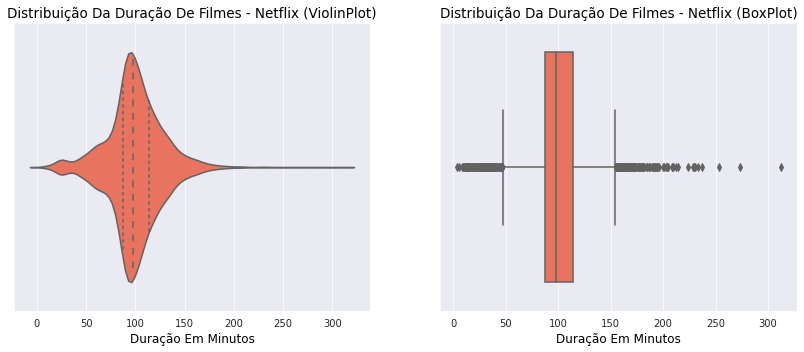

In [ ]:
# Gráfico de violino e de caixa para representar a distribuição da duração dos filmes da Netflix:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
sns.violinplot(x = df_netflix.query('min_ou_season == "min"')['duracao_qtd'],
                    inner = 'quartile', color = 'tomato', ax = ax[0])
#ax[0].figure.set_size_inches(16, 6)
ax[0].set_xlabel('Duração Em Minutos', fontsize = 12, color = 'k')
ax[0].set_title('Distribuição Da Duração De Filmes - Netflix (ViolinPlot)', fontsize = 13.5, color = 'k')
sns.boxplot(x = df_netflix.query('min_ou_season == "min"')['duracao_qtd'], color = 'tomato', ax = ax[1])
#ax[1].figure.set_size_inches(16, 6)
ax[1].set_xlabel('Duração Em Minutos', fontsize = 12, color = 'k')
ax[1].set_title('Distribuição Da Duração De Filmes - Netflix (BoxPlot)', fontsize = 13.5, color = 'k')
plt.tight_layout();

In [ ]:
# Filtragem das séries com mais tempo de duração em temporadas disponíveis na Netflix:
df_netflix.query('min_ou_season != "min"')[['titulo', 'duracao_qtd', 'min_ou_season']].sort_values('duracao_qtd', ascending = False).head(10)

,titulo,duracao_qtd,min_ou_season
548,Grey's Anatomy,17.0,Seasons
2423,Supernatural,15.0,Seasons
4798,NCIS,15.0,Seasons
1354,Heartland,13.0,Seasons
4220,COMEDIANS of the world,13.0,Seasons
7847,Red vs. Blue,13.0,Seasons
4964,Trailer Park Boys,12.0,Seasons
5412,Criminal Minds,12.0,Seasons
6795,Frasier,11.0,Seasons
6456,Cheers,11.0,Seasons


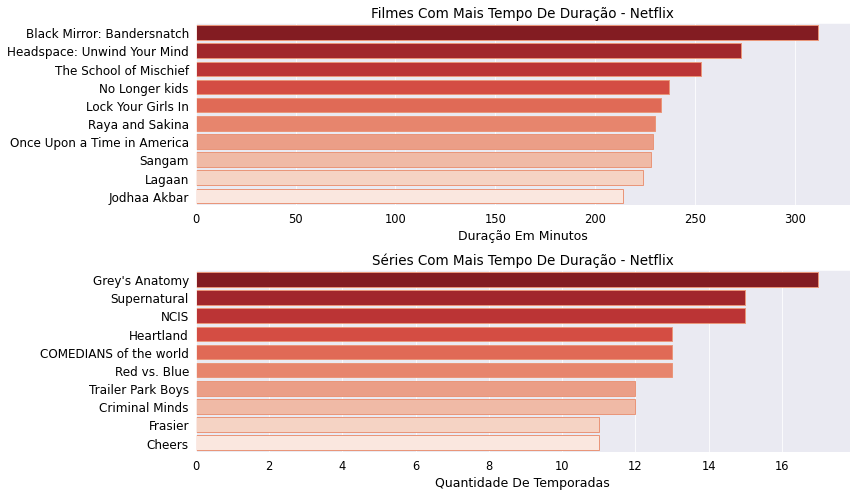

In [ ]:
# Gráficos de barras para representar separadamente os filmes com mais tempo de duração em minutos
# e as séries com mais tempo de duração em temporadas disponíveis na Netflix:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (12, 7))
sns.barplot(data = df_netflix.query('min_ou_season == "min"').sort_values('duracao_qtd', ascending = False)[['titulo', 'duracao_qtd']].head(10),
            y = 'titulo',
            x = 'duracao_qtd', ax = ax[0], palette = 'Reds_r', 
            edgecolor = 'darksalmon')
ax[0].set_ylabel('')
ax[0].set_yticklabels(df_netflix.query('min_ou_season == "min"').sort_values('duracao_qtd', ascending = False).titulo[:10].to_list(), 
                      fontsize = 12, color = 'k')
ax[0].set_xlabel('Duração Em Minutos', fontsize = 12.5, color = 'k')
ax[0].set_xticklabels(list(range(0, 301, 50)), fontsize = 11.5, color = 'k')
ax[0].set_title('Filmes Com Mais Tempo De Duração - Netflix', fontsize = 13.5, color = 'k')
sns.barplot(data = df_netflix.query('min_ou_season != "min"')[['titulo', 'duracao_qtd', 'min_ou_season']].sort_values('duracao_qtd', ascending = False).head(10),
            y = 'titulo',
            x = 'duracao_qtd', ax = ax[1], palette = 'Reds_r',
            edgecolor = 'darksalmon')
ax[1].set_ylabel('')
ax[1].set_yticklabels(df_netflix.query('min_ou_season != "min"')[['titulo', 'duracao_qtd', 'min_ou_season']].sort_values('duracao_qtd', ascending = False).titulo[:10].to_list(), 
                      fontsize = 12, color = 'k')
ax[1].set_xlabel('Quantidade De Temporadas', fontsize = 12.5, color = 'k')
ax[1].set_xticklabels(list(range(0, 17, 2)), fontsize = 11.5, color = 'k')
ax[1].set_title('Séries Com Mais Tempo De Duração - Netflix', fontsize = 13.5, color = 'k')
plt.tight_layout();

## Basicamente, o filme Black Mirror Bandersnatch original da Netflix é o filme com maior tempo de duração em minutos catalogado na plataforma, tal filme curiosamente é inovador e insólito no cinema por utilizar o expectador como um participante do filme que decidirá o destino roteirístico do filme.

## A média em minutos da duração dos filmes catalogados na Netflix é de aproximadamente 90 à 100 minutos, isto é, os filmes em média na Netflix duram aproximadamente 1 hora e 30 minutos.

## As séries com mais tempo de duração em temporadas catalogadas na Netflix são Grey's Anatomy e Supernatural com temporadas acima de 10.

In [ ]:
# Categorias de filmes ou séries disponíveis na Netflix:
df_netflix.listado_em.unique()

array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'British TV Shows, Crime TV Shows, Docuseries',
       'TV Comedies, TV Dramas', 'Documentaries, International Movies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies',
       'Comedies, 

In [ ]:
# Criação de coluna para representar as categorias de filmes e séries disponíveis na Netflix:
df_netflix = df_netflix.assign(listado_em_1 = df_netflix.listado_em.str.split(',', expand = True)[0],
                  listado_em_2 = df_netflix.listado_em.str.split(',', expand = True)[1],
                  listado_em_3 = df_netflix.listado_em.str.split(',', expand = True)[2])
print(df_netflix.shape)
df_netflix.head()

(8807, 17)


,id,tipo,titulo,diretor,elenco,cidade,data_add,ano_realizado,avaliacao,duracao,listado_em,descricao,duracao_qtd,min_ou_season,listado_em_1,listado_em_2,listado_em_3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,min,Documentaries,None,None
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Seasons,International TV Shows,TV Dramas,TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,Season,Crime TV Shows,International TV Shows,TV Action & Adventure
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,Season,Docuseries,Reality TV,None
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,Seasons,International TV Shows,Romantic TV Shows,TV Comedies


In [ ]:
# Agrupamento da categorias de filmes e séries disponíveis por quantidade na Netflix:
df_1 = df_netflix.groupby('listado_em_1').agg({'listado_em_1': 'size'}).rename(columns = {'listado_em_1': 'qtd_1'
         }).reset_index().rename(columns = {'listado_em_1': 'listado_em'})
print(df_1.shape)
df_1.head()

(36, 2)


,listado_em,qtd_1
0,Action & Adventure,859
1,Anime Features,21
2,Anime Series,176
3,British TV Shows,253
4,Children & Family Movies,605


In [ ]:
# Agrupamento da categorias de filmes e séries disponíveis por quantidade na Netflix:
df_2 = df_netflix.groupby('listado_em_2').agg({'listado_em_2': 'size'}).rename(columns = {'listado_em_2': 'qtd_2'}).reset_index().rename(columns = {'listado_em_2': 'listado_em'})
print(df_2.shape)
df_2.head()

(37, 2)


,listado_em,qtd_2
0,Anime Features,50
1,Children & Family Movies,32
2,Classic & Cult TV,6
3,Classic Movies,30
4,Comedies,452


In [ ]:
# Verificação de erros nos dados que irão impedir com que o merge entre dataframes seja realizável:
df_2.listado_em.to_list()

[' Anime Features',
 ' Children & Family Movies',
 ' Classic & Cult TV',
 ' Classic Movies',
 ' Comedies',
 ' Crime TV Shows',
 ' Cult Movies',
 ' Documentaries',
 ' Docuseries',
 ' Dramas',
 ' Faith & Spirituality',
 ' Horror Movies',
 ' Independent Movies',
 ' International Movies',
 ' International TV Shows',
 " Kids' TV",
 ' Korean TV Shows',
 ' LGBTQ Movies',
 ' Music & Musicals',
 ' Reality TV',
 ' Romantic Movies',
 ' Romantic TV Shows',
 ' Sci-Fi & Fantasy',
 ' Science & Nature TV',
 ' Spanish-Language TV Shows',
 ' Sports Movies',
 ' Stand-Up Comedy',
 ' Stand-Up Comedy & Talk Shows',
 ' TV Action & Adventure',
 ' TV Comedies',
 ' TV Dramas',
 ' TV Horror',
 ' TV Mysteries',
 ' TV Sci-Fi & Fantasy',
 ' TV Thrillers',
 ' Teen TV Shows',
 ' Thrillers']

In [ ]:
# For para corrigir tal erro presente nos dados para corrigi-los e prepara-los para
# a realização do merge entre dataframes:
l = []
for i in list(range(0, 37)):
  l.append(df_2.listado_em.loc[i][1::])
l

['Anime Features',
 'Children & Family Movies',
 'Classic & Cult TV',
 'Classic Movies',
 'Comedies',
 'Crime TV Shows',
 'Cult Movies',
 'Documentaries',
 'Docuseries',
 'Dramas',
 'Faith & Spirituality',
 'Horror Movies',
 'Independent Movies',
 'International Movies',
 'International TV Shows',
 "Kids' TV",
 'Korean TV Shows',
 'LGBTQ Movies',
 'Music & Musicals',
 'Reality TV',
 'Romantic Movies',
 'Romantic TV Shows',
 'Sci-Fi & Fantasy',
 'Science & Nature TV',
 'Spanish-Language TV Shows',
 'Sports Movies',
 'Stand-Up Comedy',
 'Stand-Up Comedy & Talk Shows',
 'TV Action & Adventure',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'TV Sci-Fi & Fantasy',
 'TV Thrillers',
 'Teen TV Shows',
 'Thrillers']

In [ ]:
# Atribuição de lista corrigida à coluna de 'listado_em':
df_2.listado_em = l
df_2.listado_em.to_list()

['Anime Features',
 'Children & Family Movies',
 'Classic & Cult TV',
 'Classic Movies',
 'Comedies',
 'Crime TV Shows',
 'Cult Movies',
 'Documentaries',
 'Docuseries',
 'Dramas',
 'Faith & Spirituality',
 'Horror Movies',
 'Independent Movies',
 'International Movies',
 'International TV Shows',
 "Kids' TV",
 'Korean TV Shows',
 'LGBTQ Movies',
 'Music & Musicals',
 'Reality TV',
 'Romantic Movies',
 'Romantic TV Shows',
 'Sci-Fi & Fantasy',
 'Science & Nature TV',
 'Spanish-Language TV Shows',
 'Sports Movies',
 'Stand-Up Comedy',
 'Stand-Up Comedy & Talk Shows',
 'TV Action & Adventure',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'TV Sci-Fi & Fantasy',
 'TV Thrillers',
 'Teen TV Shows',
 'Thrillers']

In [ ]:
# Agrupamento da categorias de filmes e séries disponíveis por quantidade na Netflix:
df_3 = df_netflix.groupby('listado_em_3').agg({'listado_em_3': 'size'}).rename(columns = {'listado_em_3': 'qtd_3'}).reset_index().rename(columns = {'listado_em_3': 'listado_em'})
print(df_3.shape)
df_3.head()

(33, 2)


,listado_em,qtd_3
0,Children & Family Movies,4
1,Classic Movies,6
2,Comedies,12
3,Cult Movies,14
4,Documentaries,1


In [ ]:
# Correção do mesmo erro para facilitar no merge posterior entre dataframes de categorias:
l1 = []
for i in list(range(0, 33)):
  l1.append(df_3.listado_em.loc[i][1:])
l1

['Children & Family Movies',
 'Classic Movies',
 'Comedies',
 'Cult Movies',
 'Documentaries',
 'Docuseries',
 'Dramas',
 'Faith & Spirituality',
 'Horror Movies',
 'Independent Movies',
 'International Movies',
 'International TV Shows',
 "Kids' TV",
 'Korean TV Shows',
 'LGBTQ Movies',
 'Music & Musicals',
 'Reality TV',
 'Romantic Movies',
 'Romantic TV Shows',
 'Sci-Fi & Fantasy',
 'Science & Nature TV',
 'Spanish-Language TV Shows',
 'Sports Movies',
 'Stand-Up Comedy & Talk Shows',
 'TV Action & Adventure',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'TV Sci-Fi & Fantasy',
 'TV Thrillers',
 'Teen TV Shows',
 'Thrillers']

In [ ]:
# Atribuição à coluna 'listado_em' uma lista com os dados corrigidos:
df_3.listado_em = l1
df_3.listado_em.to_list()

['Children & Family Movies',
 'Classic Movies',
 'Comedies',
 'Cult Movies',
 'Documentaries',
 'Docuseries',
 'Dramas',
 'Faith & Spirituality',
 'Horror Movies',
 'Independent Movies',
 'International Movies',
 'International TV Shows',
 "Kids' TV",
 'Korean TV Shows',
 'LGBTQ Movies',
 'Music & Musicals',
 'Reality TV',
 'Romantic Movies',
 'Romantic TV Shows',
 'Sci-Fi & Fantasy',
 'Science & Nature TV',
 'Spanish-Language TV Shows',
 'Sports Movies',
 'Stand-Up Comedy & Talk Shows',
 'TV Action & Adventure',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'TV Sci-Fi & Fantasy',
 'TV Thrillers',
 'Teen TV Shows',
 'Thrillers']

In [ ]:
# Merge entre categorias de filmes e séries disponíveis na Netflix:
df_1 = pd.merge(df_1, df_2, on = 'listado_em',
         how = 'outer')
print(df_1.shape)
df_1.head()

(42, 3)


,listado_em,qtd_1,qtd_2
0,Action & Adventure,859.0,NaN
1,Anime Features,21.0,50.0
2,Anime Series,176.0,NaN
3,British TV Shows,253.0,NaN
4,Children & Family Movies,605.0,32.0


In [ ]:
# Mais um merge entre dataframes de categorias dos filmes / séries da Netflix:
df_1 = df_1.merge(df_3, on = 'listado_em', how = 'outer')
print(df_1.shape)
df_1.head()

(42, 4)


,listado_em,qtd_1,qtd_2,qtd_3
0,Action & Adventure,859.0,NaN,NaN
1,Anime Features,21.0,50.0,NaN
2,Anime Series,176.0,NaN,NaN
3,British TV Shows,253.0,NaN,NaN
4,Children & Family Movies,605.0,32.0,4.0


In [ ]:
# Tipos de dados para verificarmos que não erro nos tipos de dados das colunas:
df_1.dtypes

listado_em     object
qtd_1         float64
qtd_2         float64
qtd_3         float64
dtype: object

In [ ]:
# Substituição de dados faltantes por zero para podermos converter as colunas para tipo numericamente inteiro:
df_1[['qtd_1', 'qtd_2', 'qtd_3']] = df_1[['qtd_1', 'qtd_2', 'qtd_3']].fillna(0).astype('int')
df_1

,listado_em,qtd_1,qtd_2,qtd_3
0,Action & Adventure,859,0,0
1,Anime Features,21,50,0
2,Anime Series,176,0,0
3,British TV Shows,253,0,0
4,Children & Family Movies,605,32,4
5,Classic & Cult TV,22,6,0
6,Classic Movies,80,30,6
7,Comedies,1210,452,12
8,Crime TV Shows,399,71,0
9,Cult Movies,12,45,14


In [ ]:
# Soma da quantidade total de categoria de filmes e séries disponibilizadas na Netflix:
df_1 = df_1.assign(total = df_1['qtd_1'] + df_1['qtd_2'] + df_1['qtd_3']).sort_values('total', ascending = False)
print(df_1.shape)
df_1.head(10)

(42, 5)


,listado_em,qtd_1,qtd_2,qtd_3,total
15,International Movies,128,1722,902,2752
12,Dramas,1600,758,69,2427
7,Comedies,1210,452,12,1674
16,International TV Shows,774,476,101,1351
10,Documentaries,829,39,1,869
0,Action & Adventure,859,0,0,859
31,TV Dramas,67,320,376,763
14,Independent Movies,20,576,160,756
4,Children & Family Movies,605,32,4,641
22,Romantic Movies,3,171,442,616


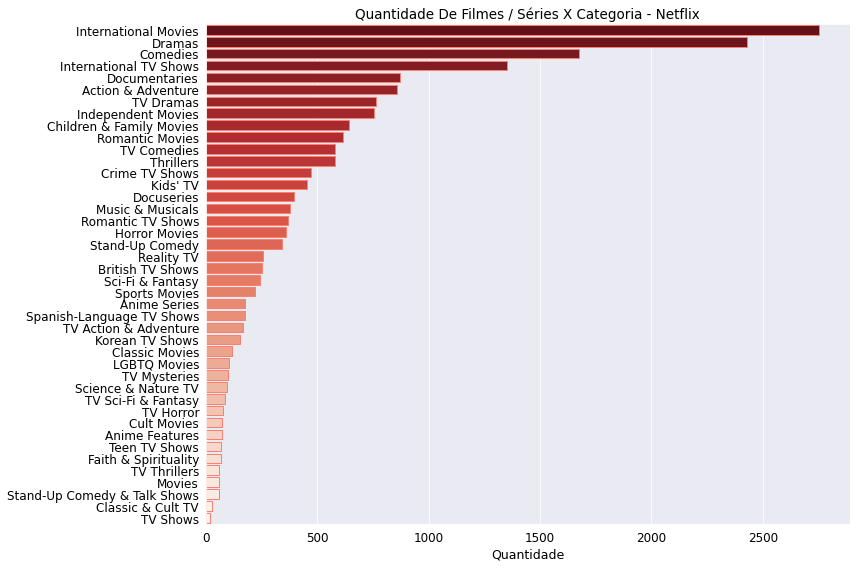

In [ ]:
# Gráfico de barras para representar quantidade de filmes e séries por categoria:
ax = sns.barplot(y = df_1['listado_em'],
                x = df_1['total'],
                 palette = 'Reds_r', edgecolor = 'salmon')
ax.figure.set_size_inches(12, 8)
ax.set_ylabel('')
ax.set_xlabel('Quantidade', fontsize = 12.5, color = 'k')
ax.set_yticklabels(df_1.listado_em.to_list(), fontsize = 12, color = 'k')
ax.set_xticklabels(list(range(0, 2501, 500)), fontsize = 12, color = 'k')
ax.set_title('Quantidade De Filmes / Séries X Categoria - Netflix', fontsize = 13.5, color = 'k')
plt.tight_layout();

In [ ]:
# Filtragem de filmes para sabermos a quantidade de filmes por categoria na Netflix:
df_1_v2 = df_netflix.query('tipo == "Movie"').groupby('listado_em_1').agg({'listado_em_1': 'size',}).rename(
    columns = {'listado_em_1': 'qtd_1'}
).reset_index().rename(columns = {'listado_em_1': 'listado_em'})
print(df_1_v2.shape)
df_1_v2.head()

(19, 2)


,listado_em,qtd_1
0,Action & Adventure,859
1,Anime Features,21
2,Children & Family Movies,605
3,Classic Movies,80
4,Comedies,1210


In [ ]:
# Filtragem de filmes para sabermos a quantidade de filmes por categoria na Netflix:
df_2_v2 = df_netflix.query('tipo == "Movie"').groupby('listado_em_2').agg({'listado_em_2': 'size',}).rename(
    columns = {'listado_em_2': 'qtd_2'}
).reset_index().rename(columns = {'listado_em_2': 'listado_em'})
print(df_2_v2.shape)
df_2_v2.head()

(18, 2)


,listado_em,qtd_2
0,Anime Features,50
1,Children & Family Movies,32
2,Classic Movies,30
3,Comedies,452
4,Cult Movies,45


In [ ]:
# Filtragem de filmes para sabermos a quantidade de filmes por categoria na Netflix:
df_3_v2 = df_netflix.query('tipo == "Movie"').groupby('listado_em_3').agg({'listado_em_3': 'size',}).rename(
    columns = {'listado_em_3': 'qtd_3'}
).reset_index().rename(columns = {'listado_em_3': 'listado_em'})
print(df_3_v2.shape)
df_3_v2.head()

(16, 2)


,listado_em,qtd_3
0,Children & Family Movies,4
1,Classic Movies,6
2,Comedies,12
3,Cult Movies,14
4,Documentaries,1


In [ ]:
# Verificação para sabermos se há o mesmo erro nos dados que impedirão o merge entre dataframes:
df_2_v2.listado_em.to_list()

[' Anime Features',
 ' Children & Family Movies',
 ' Classic Movies',
 ' Comedies',
 ' Cult Movies',
 ' Documentaries',
 ' Dramas',
 ' Faith & Spirituality',
 ' Horror Movies',
 ' Independent Movies',
 ' International Movies',
 ' LGBTQ Movies',
 ' Music & Musicals',
 ' Romantic Movies',
 ' Sci-Fi & Fantasy',
 ' Sports Movies',
 ' Stand-Up Comedy',
 ' Thrillers']

In [ ]:
# len() para sabermos a quantidade de elementos presentes na lista e assim aplicarmos o for para corrigir os dados:
len(df_2_v2.listado_em.to_list())

18

In [ ]:
# Correção do erros nos dados e atribuição subsequente para podermos realizar posteriormente o merge entre dataframes:
l = []
for i in list(range(0, 18)):
  l.append(df_2_v2.listado_em.loc[i][1::])
df_2_v2.listado_em = l
df_2_v2.listado_em.to_list()

['Anime Features',
 'Children & Family Movies',
 'Classic Movies',
 'Comedies',
 'Cult Movies',
 'Documentaries',
 'Dramas',
 'Faith & Spirituality',
 'Horror Movies',
 'Independent Movies',
 'International Movies',
 'LGBTQ Movies',
 'Music & Musicals',
 'Romantic Movies',
 'Sci-Fi & Fantasy',
 'Sports Movies',
 'Stand-Up Comedy',
 'Thrillers']

In [ ]:
# Correção do mesmo erro nos dados:
len(df_3_v2.listado_em.to_list())

16

In [ ]:
# Aplicação do for novamente para corrigirmos o mesmo erro:
l1 = []
for i in list(range(0, 16)):
  l1.append(df_3_v2.listado_em.loc[i][1::])
df_3_v2.listado_em = l1
df_3_v2.listado_em.to_list()

['Children & Family Movies',
 'Classic Movies',
 'Comedies',
 'Cult Movies',
 'Documentaries',
 'Dramas',
 'Faith & Spirituality',
 'Horror Movies',
 'Independent Movies',
 'International Movies',
 'LGBTQ Movies',
 'Music & Musicals',
 'Romantic Movies',
 'Sci-Fi & Fantasy',
 'Sports Movies',
 'Thrillers']

In [ ]:
# Merge entre dataframe da categoria de filmes catalogados na Netflix:
df_1_v2 = pd.merge(df_1_v2, df_2_v2, on = 'listado_em',
         how = 'outer').fillna(0)
print(df_1_v2.shape)
df_1_v2.head(10)

(20, 3)


,listado_em,qtd_1,qtd_2
0,Action & Adventure,859.0,0.0
1,Anime Features,21.0,50.0
2,Children & Family Movies,605.0,32.0
3,Classic Movies,80.0,30.0
4,Comedies,1210.0,452.0
5,Cult Movies,12.0,45.0
6,Documentaries,829.0,39.0
7,Dramas,1600.0,758.0
8,Horror Movies,275.0,75.0
9,Independent Movies,20.0,576.0


In [ ]:
# Merge entre dataframe da categoria de filmes catalogados na Netflix:
df_1_v2 = pd.merge(df_1_v2, df_3_v2, on = 'listado_em',
         how = 'outer').fillna(0)
print(df_1_v2.shape)
df_1_v2.head()

(20, 4)


,listado_em,qtd_1,qtd_2,qtd_3
0,Action & Adventure,859.0,0.0,0.0
1,Anime Features,21.0,50.0,0.0
2,Children & Family Movies,605.0,32.0,4.0
3,Classic Movies,80.0,30.0,6.0
4,Comedies,1210.0,452.0,12.0


In [ ]:
# Conversão das colunas para tipo numericamente inteiro:
df_1_v2[['qtd_1', 'qtd_2', 'qtd_3']] = df_1_v2[['qtd_1', 'qtd_2', 'qtd_3']].astype('int')
df_1_v2.head(10)

,listado_em,qtd_1,qtd_2,qtd_3
0,Action & Adventure,859,0,0
1,Anime Features,21,50,0
2,Children & Family Movies,605,32,4
3,Classic Movies,80,30,6
4,Comedies,1210,452,12
5,Cult Movies,12,45,14
6,Documentaries,829,39,1
7,Dramas,1600,758,69
8,Horror Movies,275,75,7
9,Independent Movies,20,576,160


In [ ]:
# Criação de coluna para representar a quantidade de filmes disponíveis na Netflix por categoria:
df_1_v2 = df_1_v2.assign(total = df_1_v2['qtd_1'] + df_1_v2['qtd_2'] + df_1_v2['qtd_3']).sort_values('total', ascending = False)
print(df_1_v2.shape)
df_1_v2.head(10)

(20, 5)


,listado_em,qtd_1,qtd_2,qtd_3,total
10,International Movies,128,1722,902,2752
7,Dramas,1600,758,69,2427
4,Comedies,1210,452,12,1674
6,Documentaries,829,39,1,869
0,Action & Adventure,859,0,0,859
9,Independent Movies,20,576,160,756
2,Children & Family Movies,605,32,4,641
14,Romantic Movies,3,171,442,616
18,Thrillers,65,232,280,577
13,Music & Musicals,18,148,209,375


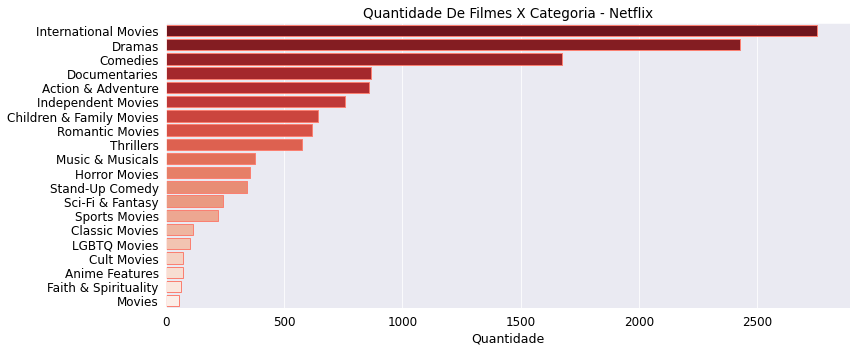

In [ ]:
# Gráfico de barras para representar a quantidade de filmes por categoria catalogados na Netflix:
ax = sns.barplot(data = df_1_v2,
                 x = 'total',
                 y = 'listado_em',
                 palette = 'Reds_r',
                 edgecolor = 'salmon')
ax.figure.set_size_inches(12, 5)
ax.set_ylabel('')
ax.set_xlabel('Quantidade', fontsize = 12.5, color = 'k')
ax.set_yticklabels(df_1_v2.listado_em.to_list(), fontsize = 12, color = 'k')
ax.set_xticklabels(list(range(0, 2501, 500)), fontsize = 12, color = 'k')
ax.set_title('Quantidade De Filmes X Categoria - Netflix', fontsize = 13.5, color = 'k')
plt.tight_layout();

In [ ]:
# Realização do mesmo processo anterior para séries:
df_1_v3 = df_netflix.query('tipo == "TV Show"').groupby('listado_em_1').agg({'listado_em_1': 'size'}).rename(columns = {
    'listado_em_1': 'qtd_1'
}).reset_index().rename(columns = {
    'listado_em_1': 'listado_em'
})
print(df_1_v3.shape)
df_1_v3.head(10)

(17, 2)


,listado_em,qtd_1
0,Anime Series,176
1,British TV Shows,253
2,Classic & Cult TV,22
3,Crime TV Shows,399
4,Docuseries,221
5,International TV Shows,774
6,Kids' TV,388
7,Reality TV,120
8,Romantic TV Shows,32
9,Spanish-Language TV Shows,2


In [ ]:
# Realização do mesmo processo anterior para séries:
df_2_v3 = df_netflix.query('tipo == "TV Show"').groupby('listado_em_2').agg({'listado_em_2': 'size',}).rename(
    columns = {'listado_em_2': 'qtd_2'}
).reset_index().rename(columns = {'listado_em_2': 'listado_em'})
print(df_2_v3.shape)
df_2_v3.head(10)

(19, 2)


,listado_em,qtd_2
0,Classic & Cult TV,6
1,Crime TV Shows,71
2,Docuseries,153
3,International TV Shows,476
4,Kids' TV,62
5,Korean TV Shows,131
6,Reality TV,95
7,Romantic TV Shows,239
8,Science & Nature TV,45
9,Spanish-Language TV Shows,66


In [ ]:
# Realização do mesmo processo anterior para séries:
df_3_v3 = df_netflix.query('tipo == "TV Show"').groupby('listado_em_3').agg({'listado_em_3': 'size',}).rename(
    columns = {'listado_em_3': 'qtd_3'}
).reset_index().rename(columns = {'listado_em_3': 'listado_em'})
print(df_3_v3.shape)
df_3_v3.head(10)

(17, 2)


,listado_em,qtd_3
0,Docuseries,21
1,International TV Shows,101
2,Kids' TV,1
3,Korean TV Shows,20
4,Reality TV,40
5,Romantic TV Shows,99
6,Science & Nature TV,47
7,Spanish-Language TV Shows,106
8,Stand-Up Comedy & Talk Shows,6
9,TV Action & Adventure,45


In [ ]:
# Realização do mesmo processo anterior para séries:
df_2_v3.listado_em.to_list()

[' Classic & Cult TV',
 ' Crime TV Shows',
 ' Docuseries',
 ' International TV Shows',
 " Kids' TV",
 ' Korean TV Shows',
 ' Reality TV',
 ' Romantic TV Shows',
 ' Science & Nature TV',
 ' Spanish-Language TV Shows',
 ' Stand-Up Comedy & Talk Shows',
 ' TV Action & Adventure',
 ' TV Comedies',
 ' TV Dramas',
 ' TV Horror',
 ' TV Mysteries',
 ' TV Sci-Fi & Fantasy',
 ' TV Thrillers',
 ' Teen TV Shows']

In [ ]:
# Realização do mesmo processo anterior para séries:
len(df_2_v3.listado_em.to_list())

19

In [ ]:
# Realização do mesmo processo anterior para séries:
l = []
for i in list(range(0, 19)):
  l.append(df_2_v3.listado_em.loc[i][1::])
df_2_v3.listado_em = l
df_2_v3.listado_em.to_list()

['Classic & Cult TV',
 'Crime TV Shows',
 'Docuseries',
 'International TV Shows',
 "Kids' TV",
 'Korean TV Shows',
 'Reality TV',
 'Romantic TV Shows',
 'Science & Nature TV',
 'Spanish-Language TV Shows',
 'Stand-Up Comedy & Talk Shows',
 'TV Action & Adventure',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'TV Sci-Fi & Fantasy',
 'TV Thrillers',
 'Teen TV Shows']

In [ ]:
# Realização do mesmo processo anterior para séries:
len(df_3_v3.listado_em.to_list())

17

In [ ]:
# Realização do mesmo processo anterior para séries:
l1 = []
for i in list(range(0, 17)):
  l1.append(df_3_v3.listado_em.loc[i][1::])
df_3_v3.listado_em = l1
df_3_v3.listado_em.to_list()

['Docuseries',
 'International TV Shows',
 "Kids' TV",
 'Korean TV Shows',
 'Reality TV',
 'Romantic TV Shows',
 'Science & Nature TV',
 'Spanish-Language TV Shows',
 'Stand-Up Comedy & Talk Shows',
 'TV Action & Adventure',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'TV Sci-Fi & Fantasy',
 'TV Thrillers',
 'Teen TV Shows']

In [ ]:
# Realização do mesmo processo anterior para séries:
df_1_v3 = pd.merge(df_1_v3, df_2_v3, on = 'listado_em', how = 'outer').fillna(0)
print(df_1_v3.shape)
df_1_v3.head(10)

(22, 3)


,listado_em,qtd_1,qtd_2
0,Anime Series,176.0,0.0
1,British TV Shows,253.0,0.0
2,Classic & Cult TV,22.0,6.0
3,Crime TV Shows,399.0,71.0
4,Docuseries,221.0,153.0
5,International TV Shows,774.0,476.0
6,Kids' TV,388.0,62.0
7,Reality TV,120.0,95.0
8,Romantic TV Shows,32.0,239.0
9,Spanish-Language TV Shows,2.0,66.0


In [ ]:
# Realização do mesmo processo anterior para séries:
df_1_v3 = pd.merge(df_1_v3, df_3_v3, on = 'listado_em',
         how = 'outer').fillna(0)
print(df_1_v3.shape)
df_1_v3.head(10)

(22, 4)


,listado_em,qtd_1,qtd_2,qtd_3
0,Anime Series,176.0,0.0,0.0
1,British TV Shows,253.0,0.0,0.0
2,Classic & Cult TV,22.0,6.0,0.0
3,Crime TV Shows,399.0,71.0,0.0
4,Docuseries,221.0,153.0,21.0
5,International TV Shows,774.0,476.0,101.0
6,Kids' TV,388.0,62.0,1.0
7,Reality TV,120.0,95.0,40.0
8,Romantic TV Shows,32.0,239.0,99.0
9,Spanish-Language TV Shows,2.0,66.0,106.0


In [ ]:
# Realização do mesmo processo anterior para séries:
df_1_v3[['qtd_1', 'qtd_2', 'qtd_3']] = df_1_v3[['qtd_1', 'qtd_2', 'qtd_3']].astype(int)
df_1_v3

,listado_em,qtd_1,qtd_2,qtd_3
0,Anime Series,176,0,0
1,British TV Shows,253,0,0
2,Classic & Cult TV,22,6,0
3,Crime TV Shows,399,71,0
4,Docuseries,221,153,21
5,International TV Shows,774,476,101
6,Kids' TV,388,62,1
7,Reality TV,120,95,40
8,Romantic TV Shows,32,239,99
9,Spanish-Language TV Shows,2,66,106


In [ ]:
# Realização do mesmo processo anterior para séries:
df_1_v3 = df_1_v3.assign(total = df_1_v3['qtd_1'] + df_1_v3['qtd_2'] + df_1_v3['qtd_3']).sort_values('total', ascending = False)
df_1_v3.head(10)

,listado_em,qtd_1,qtd_2,qtd_3,total
5,International TV Shows,774,476,101,1351
13,TV Dramas,67,320,376,763
12,TV Comedies,120,269,192,581
3,Crime TV Shows,399,71,0,470
6,Kids' TV,388,62,1,451
4,Docuseries,221,153,21,395
8,Romantic TV Shows,32,239,99,370
7,Reality TV,120,95,40,255
1,British TV Shows,253,0,0,253
0,Anime Series,176,0,0,176


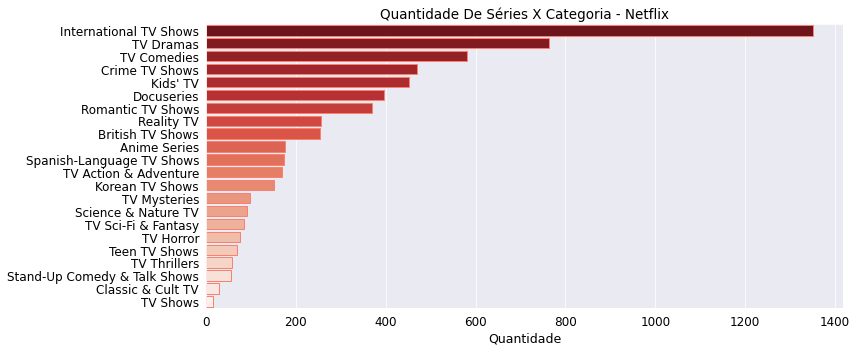

In [ ]:
# Gráfico de barras para representar a quantidade de séries adicionadas na Netflix por categoria:
ax = sns.barplot(y = 'listado_em',
                 x = 'total', palette = 'Reds_r', edgecolor = 'salmon', data = df_1_v3)
ax.figure.set_size_inches(12, 5)
ax.set_ylabel('')
ax.set_xlabel('Quantidade', fontsize = 12.5, color = 'k')
ax.set_yticklabels(df_1_v3.listado_em.to_list(), fontsize = 12, color = 'k')
ax.set_xticklabels(list(range(0, 1401, 200)), fontsize = 12, color = 'k')
ax.set_title('Quantidade De Séries X Categoria - Netflix', fontsize = 13.5, color = 'k')
plt.tight_layout();

## Na Netflix, os tipos de filmes mais disponíveis na plataforma são principalmente filmes internacionais, filmes de comédia, drama e especialmente documentários que são considerados tipologicamente como filmes.

## Os tipos de séries mais disponibilizados na Netflix são séries internacionais, séries de drama, de comédia e especialmente séries criminais. Coincidentemente, os tipos de filmes mais catalogados são quase os mesmos tipos de séries catalogadas na Netflix.

# ANÁLISE EXPLORATÓRIA DE DADOS FINALIZADA